In [10]:
import json
#import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [3]:
## every gene has a "GENE_mRNA_sitesRemoved.fasta.FEL.json"

## use keys of dict to filter over FEL data, use the values to viz the busteds data ##

GENES = {
    "HspB1":[
        "K123-Y143.fasta.BUSTEDS.json",
        "L58-S78.fasta.BUSTEDS.json",
        "M1-G122.fasta.BUSTEDS.json", 
        "M1-P57.fasta.BUSTEDS.json",
        "M169-K205.fasta.BUSTEDS.json", 
        "R79-P168.fasta.BUSTEDS.json",
        "T144-K205.fasta.BUSTEDS.json"
        ],
    
    "HspB3":[
        "F71-L139.fasta.BUSTEDS.json",
        "M1-P40.fasta.BUSTEDS.json",
        "T41-H70.fasta.BUSTEDS.json",
        "V140-K150.fasta.BUSTEDS.json"
    ],
    
    "HspB5":[
        "G64-R149.fasta.BUSTEDS.json",
        "K150-K175.fasta.BUSTEDS.json",
        "M1-E67.fasta.BUSTEDS.json",
        "M1-P51.fasta.BUSTEDS.json",
        "M68-R107.fasta.BUSTEDS.json",
        "P52-T63.fasta.BUSTEDS.json",
        "Q108-K175.fasta.BUSTEDS.json"
    ],
    
    "HspB8":[
        "E94-Y174.fasta.BUSTEDS.json",
        "K124-I143.fasta.BUSTEDS.json",
        "M1-G123.fasta.BUSTEDS.json",
        "M1-M68.fasta.BUSTEDS.json",
        "Q144-T196.fasta.BUSTEDS.json",
        "S175-T196.fasta.BUSTEDS.json",
        "V69-G93.fasta.BUSTEDS.json"
    ]
}

### FEL viz: making each FEL graph separate for each gene
outputs: a PNG to viz, and CSV with a list of sites that were positive

WORKING WITH HspB1


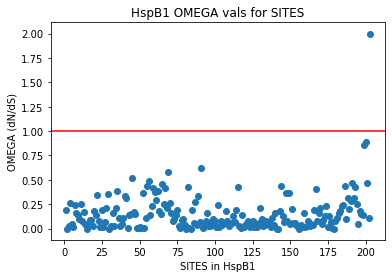

DONE WITH HspB1

WORKING WITH HspB3


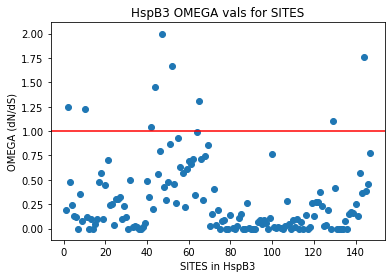

DONE WITH HspB3

WORKING WITH HspB5


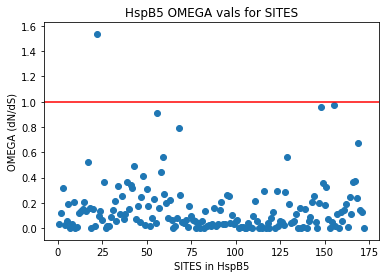

DONE WITH HspB5

WORKING WITH HspB8


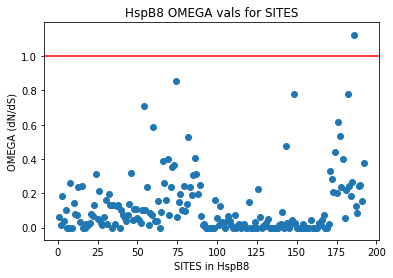

DONE WITH HspB8



In [38]:

total_csv = []

for gene in list(GENES.keys()):
    
    ## write output csv with positive sites ##
    
    print(f"WORKING WITH {gene}")
    FEL_json = "data/%s/sections/%s-mRNA_sitesRemoved.fasta.FEL.json" % (gene,gene)
    
    with open(FEL_json, "r") as in_j:
        json_data = json.load(in_j)
    
    ##               0        1         2          3       4       5
    ## headers = ["alpha", "beta", "alpha=beta", "LRT", "p-val", "TBL" ]
    
    MLE = json_data["MLE"]["content"]["0"]
    
    negative = []
    neutral = []
    # list of tuples with site and FEL data for site
    positive = []
    
    x = []
    y = []
    
    ## currently not checking p-val ## 
    for pos, item in enumerate(MLE):
        
        omega = 0
        alpha = item[0]
        beta = item[1]
    
        if alpha != 0 and beta != 0:
            omega = beta/alpha
      
        if omega > 2:
            omega = 2

        if omega < .95:
            negative.append(pos+1)
        elif 0.96 <= omega <= 1.1:
            neutral.append(pos+1)
        else:
            positive.append((pos+1, omega, item))
            total_csv.append((gene, pos+1, omega, item))
        
        x.append(pos+1)
        y.append(omega)
    
    ## build viz
    plt.scatter(x, y)
    plt.axhline(y=1, color='r', linestyle='-')
    
    xlab = "SITES in %s" % gene

    plt.xlabel(xlab)
    plt.ylabel("OMEGA (dN/dS)")
    
    title = "%s OMEGA vals for SITES" % gene
    plt.title(title)
        
    file_name = "data/%s/sections/%s_FEL.png" % (gene,gene)
    plt.savefig(file_name)
    plt.show()
    
    print(f"DONE WITH {gene}\n")
    
## now CSV ##
out_csv = "data/POSITIVE_SELECTION.csv" 
with open(out_csv, "w") as out_f:
    out_f.write("GENE,SITE,OMEGA,ALPHA,BETA,ALPHA=BETA,LRT,P-VAL,TBL\n")
    for ps in total_csv:
        out_f.write("{},{},{},{}\n".format(ps[0], ps[1], ps[2], ",".join([str(f) for f in ps[3]])))